In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
###################################################################
# Plot options
###################################################################

font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15,7)

###################################################################
# Colors
###################################################################
# Palette 1
#tableau20 = [(82, 96, 131), (174, 199, 232), (225, 134, 40), (255, 187, 120),
#             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
#             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
#             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
#             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Palette 1
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
MarkerSize=20
palette=tableau20

import matplotlib
matplotlib.colors.ColorConverter.colors['palette1'] = palette[0]
matplotlib.colors.ColorConverter.colors['palette2'] = palette[2]
matplotlib.colors.ColorConverter.colors['palette3'] = palette[4]
matplotlib.colors.ColorConverter.colors['palette4'] = palette[6]
matplotlib.colors.ColorConverter.colors['palette5'] = palette[8]
matplotlib.colors.ColorConverter.colors['palette6'] = palette[10]
matplotlib.colors.ColorConverter.colors['palette7'] = palette[12]
matplotlib.colors.ColorConverter.colors['palette8'] = palette[14]
matplotlib.colors.ColorConverter.colors['palette9'] = palette[16]
matplotlib.colors.ColorConverter.colors['palette10'] = palette[18]

paletteNames=['palette1','palette2','palette3','palette4',
              'palette5','palette6','palette7','palette8',
              'palette9','palette10']

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb=tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    return tuple([x/255. for x in rgb])

from matplotlib.colors import LinearSegmentedColormap

my_colormap=LinearSegmentedColormap.from_list("my_colormap", [palette[0],hex_to_rgb("#ffffff"), palette[2] ], N=1000)


cm_blue3 = LinearSegmentedColormap.from_list("my_blue3", [hex_to_rgb("#FFFFFF"),palette[0]], N=1000)
cm_orange3 = LinearSegmentedColormap.from_list("my_orange3", [hex_to_rgb("#FFFFFF"),palette[2]], N=1000)

###################################################################
# Fessa palette for python matplotlib
###################################################################
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb=tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    return tuple([x/255. for x in rgb])


paletteFessa = [
          hex_to_rgb("#1F3B73"),
          hex_to_rgb("#2F9294"),
          hex_to_rgb("#50B28D"),
          hex_to_rgb("#A7D655"),
          hex_to_rgb("#FFE03E"),
          hex_to_rgb("#FFA955"),
          hex_to_rgb("#D6573B")
         ]

cm_fessa = LinearSegmentedColormap.from_list("fessa", paletteFessa, N=1000)

matplotlib.colors.ColorConverter.colors['fessa1'] = paletteFessa[0]
matplotlib.colors.ColorConverter.colors['fessa2'] = paletteFessa[1]
matplotlib.colors.ColorConverter.colors['fessa3'] = paletteFessa[2]
matplotlib.colors.ColorConverter.colors['fessa4'] = paletteFessa[3]
matplotlib.colors.ColorConverter.colors['fessa5'] = paletteFessa[4]
matplotlib.colors.ColorConverter.colors['fessa6'] = paletteFessa[5]
matplotlib.colors.ColorConverter.colors['fessa7'] = paletteFessa[6]

fessaNames=['fessa1', 'fessa2' , 'fessa3', 'fessa4', 
              'fessa5', 'fessa6' , 'fessa7']

cm_fessa2 = LinearSegmentedColormap.from_list("fessa", [paletteFessa[1],hex_to_rgb("#ffffff"),paletteFessa[5]], N=1000)


# References

In [10]:
references0bar=np.genfromtxt("02_References/Pressure1bar/results.txt")
references10000bar=np.genfromtxt("02_References/Pressure10000bar/results.txt")

## Reweight

In [3]:
COLVAR=np.genfromtxt("03_MultithermalMultibaric/Reweight/COLVARtrim")

In [4]:
CV=COLVAR[:,4]
vesBias=COLVAR[:,5]
energy=COLVAR[:,1]
energy2=np.copy(COLVAR[:,1])
energy-=np.mean(energy)
vol=COLVAR[:,2]
vol2=np.copy(COLVAR[:,2])
vol-=np.mean(vol)
wallBias=COLVAR[:,9]
totalBias=vesBias+wallBias
temp=400
beta=1./(0.00831441001626*temp)
pressure=5000*0.06022140857

### Compute mean and errors with batches

In [5]:
def batch(data,total_batch_num,batch_num):
    if (batch_num<0):
        raise Exception('batch_num must be greater than 0! Start from index 0')
    if (batch_num>(total_batch_num-1)):
        raise Exception('batch_num must be smaller than total_batch_num-1!')
    batch_size=int(data.shape[0]/total_batch_num)
    start=batch_size*batch_num
    end=batch_size*(batch_num+1)
    if (end>data.shape[0]):
        end=data.shape[0]
    return data[start:end]

In [6]:
def freeEnergies(CV,bias,vol,temperature,pressure,tempPrimes,pressurePrimes,total_batch_num,CVlimit):
    N=tempPrimes.shape[0]
    M=pressurePrimes.shape[0]
    freeEnergiesStruct=np.zeros([N,M,total_batch_num])
    beta=1./(0.00831441001626*temperature)
    for i in range(N):
        betaPrime=1./(0.00831441001626*tempPrimes[i])
        for j in range(M):
            for k in range(total_batch_num):
                probLiquid=np.sum(np.exp(beta*batch(bias[CV<=CVlimit],total_batch_num,k))*np.exp((beta-betaPrime)*batch(energy[CV<=CVlimit],total_batch_num,k)+(beta*pressure-betaPrime*pressurePrimes[j])*batch(vol[CV<=CVlimit],total_batch_num,k)))
                probSolid=np.sum(np.exp(beta*batch(bias[CV>=CVlimit],total_batch_num,k))*np.exp((beta-betaPrime)*batch(energy[CV>=CVlimit],total_batch_num,k)+(beta*pressure-betaPrime*pressurePrimes[j])*batch(vol[CV>=CVlimit],total_batch_num,k)))
                freeEnergiesStruct[i,j,k]=-(1./betaPrime)*np.log(probSolid/probLiquid)
    return freeEnergiesStruct

In [31]:
N=41
M=41
tempPrimes=np.linspace(350,450,N)
pressurePrimes=0.06022140857*np.linspace(0,10000,M)
temperature=400
pressure=5000*0.06022140857
total_batch_num=20
#freeEnergiesBcc=freeEnergies(CV,totalBias,vol,temperature,pressure,tempPrimes,pressurePrimes,total_batch_num,125)
freeEnergiesBcc=np.load("03_MultithermalMultibaric/freeEnergiesBcc.npy")

In [32]:
#np.save("freeEnergiesBcc.npy", freeEnergiesBcc)

In [33]:
freeEnergiesBccMean=np.mean(freeEnergiesBcc,axis=2)
freeEnergiesBccErrors=np.std(freeEnergiesBcc,axis=2)
freeEnergiesBccMin=np.amin(freeEnergiesBcc,axis=2)
freeEnergiesBccMax=np.amax(freeEnergiesBcc,axis=2)

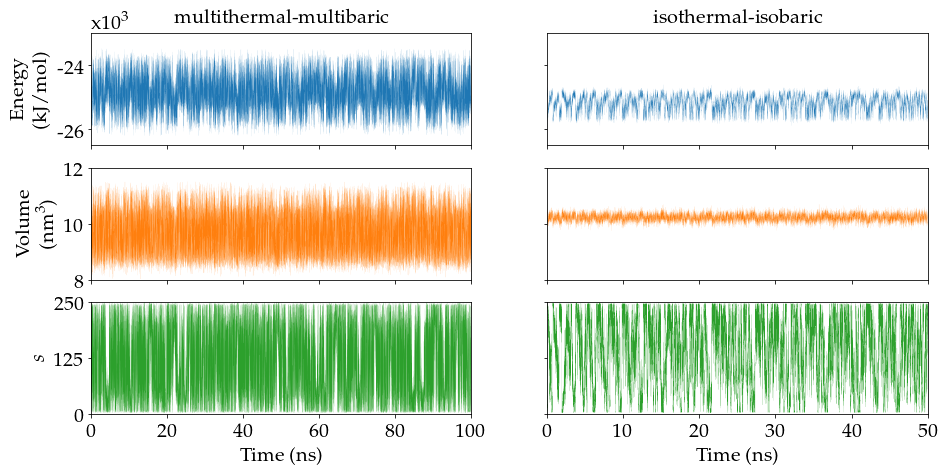

In [13]:
fig = plt.figure() 

ax1 = plt.subplot2grid((3,2), (0,0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((3,2), (1,0), colspan=1, rowspan=1) #, projection='3d')
ax3 = plt.subplot2grid((3,2), (2,0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((3,2), (0,1), colspan=1, rowspan=1)
ax5 = plt.subplot2grid((3,2), (1,1), colspan=1, rowspan=1) #, projection='3d')
ax6 = plt.subplot2grid((3,2), (2,1), colspan=1, rowspan=1)
indeces=np.r_[0:14000,30000:94000,120000:CV.shape[0]]
#print(indeces)

x=np.linspace(0,energy2.shape[0]/1000,energy2.shape[0])

ax1.plot(x,energy2,linewidth=0.05,color=palette[0])
ax2.plot(x,vol2,linewidth=0.05,color=palette[2])
ax3.plot(x,CV,linewidth=0.05,color=palette[4])

ax1.set_xticks(np.arange(0,120,20))
ax2.set_xticks(np.arange(0,120,20))
ax3.set_xticks(np.arange(0,120,20))

ax1.set_xlim([0,100])
ax2.set_xlim([0,100])
ax3.set_xlim([0,100])
ax4.set_xlim([0,50])
ax5.set_xlim([0,50])
ax6.set_xlim([0,50])

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])

ax3.set_xlabel("Time (ns)")
ax6.set_xlabel("Time (ns)")

ref = np.genfromtxt("02_References/Example/COLVAR")    
                    
ax4.plot(ref[:,0]/1000,ref[:,1],color=palette[0],alpha=1.0,linewidth=0.05)
ax5.plot(ref[:,0]/1000,ref[:,2],color=palette[2],alpha=1.0,linewidth=0.05)
ax6.plot(ref[:,0]/1000,ref[:,4],color=palette[4],alpha=1.0,linewidth=0.1)


ax1.set_ylim([-26500,-23000])
ax4.set_ylim([-26500,-23000])
ax2.set_ylim([8,12])
ax5.set_ylim([8,12])
ax3.set_ylim([0,250])
ax6.set_ylim([0,250])

ax4.set_yticklabels([])
ax5.set_yticklabels([])
ax6.set_yticklabels([])

ax1.set_yticklabels(["-26","-26","-24"])
ax1.text(0,-22700,r"x$10^3$",ha='left',va='center')


ax3.set_yticks([0,125,250])
ax6.set_yticks([0,125,250])

ax1.set_ylabel("Energy \n(kJ/mol)")
ax2.set_ylabel("Volume \n"+ r" (nm$^3$)")
ax3.set_ylabel(r"$s$")

ax1.text(50,-22500,r"multithermal-multibaric",ha='center',va='center')

ax4.text(25,-22500,"isothermal-isobaric",ha='center',va='center')

#plt.savefig("/home/piaggp/Desktop/plot-SI-al-fcc-traj.pdf", bbox_inches='tight')
#plt.savefig("/home/piaggp/Desktop/plot-SI-na-traj.png", bbox_inches='tight',dpi=300)

plt.show()

/home/pablo/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


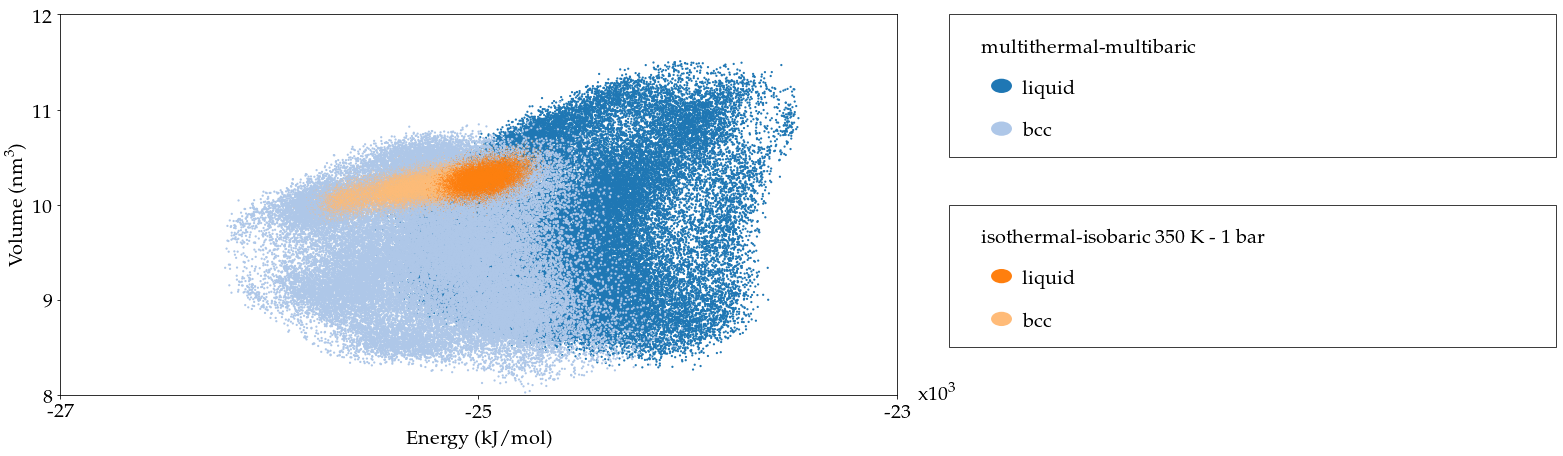

In [15]:
fig = plt.figure()

x=energy2
y=vol2
cv=CV
plt.scatter(x[cv<125],y[cv<125],s=5.0,color=palette[0],alpha=1.0,edgecolors='none')
plt.scatter(x[cv>125],y[cv>125],s=5.0,color=palette[1],alpha=1.0,edgecolors='none')

x=ref[10000:,1]
y=ref[10000:,2]
cv=ref[10000:,4]
plt.scatter(x[cv>125],y[cv>125],s=0.5,color=palette[3],alpha=1.0,edgecolors='none')
plt.scatter(x[cv<125],y[cv<125],s=0.5,color=palette[2],alpha=1.0,edgecolors='none')

plt.yticks(np.arange(8,13,1))
plt.xticks([-27000,-25000,-23000],["-27","-25","-23"])
plt.text(-22900,8,r"x$10^3$",ha='left',va='center')

plt.xlim([-27000,-23000])
plt.ylim([8,12])

plt.xlabel("Energy (kJ/mol)")
plt.ylabel(r"Volume (nm$^3$)")


ax = plt.subplot(111)
ax.add_patch(plt.Rectangle((-22750,8.5),2900, 1.5,facecolor='white',edgecolor='black',
                              clip_on=False,linewidth = 0.75))
ax.add_patch(plt.Rectangle((-22750,10.5),2900, 1.5,facecolor='white',edgecolor='black',
                              clip_on=False,linewidth = 0.75))

from matplotlib.patches import Ellipse

ax.add_patch(Ellipse((-22500,11.25),100,0.15,facecolor=palette[0],
                              clip_on=False,linewidth = 0.))
ax.add_patch(Ellipse((-22500,10.8),100,0.15,facecolor=palette[1],
                              clip_on=False,linewidth = 0.))

ax.add_patch(Ellipse((-22500,9.25),100,0.15,facecolor=palette[2],
                              clip_on=False,linewidth = 0.))
ax.add_patch(Ellipse((-22500,8.8),100,0.15,facecolor=palette[3],
                              clip_on=False,linewidth = 0.))

ax.text(-22600,11.6,"multithermal-multibaric")
ax.text(-22600,9.6,"isothermal-isobaric 350 K - 1 bar")

ax.text(-22400,11.175,"liquid")
ax.text(-22400,10.725,"bcc")

ax.text(-22400,9.175,"liquid")
ax.text(-22400,8.725,"bcc")

#plt.savefig("/home/piaggp/Desktop/plot-SI-al-fcc-EV.pdf", bbox_inches='tight')
#plt.savefig("/home/piaggp/Desktop/plot-SI-na-EV.png", bbox_inches='tight',dpi=300)

plt.show()

In [16]:
def orderParameterMean(CV,bias,vol,temperature,pressure,tempPrimes,pressurePrimes):
    N=tempPrimes.shape[0]
    M=pressurePrimes.shape[0]
    OPM=np.zeros([N,M])
    beta=1./(0.00831441001626*temperature)
    for i in range(N):
        betaPrime=1./(0.00831441001626*tempPrimes[i])
        for j in range(M):
            mean=np.sum(CV*np.exp(beta*bias)*np.exp((beta-betaPrime)*energy+(beta*pressure-betaPrime*pressurePrimes[j])*vol))
            norm=np.sum(np.exp(beta*bias)*np.exp((beta-betaPrime)*energy+(beta*pressure-betaPrime*pressurePrimes[j])*vol))
            OPM[i,j]=mean/norm
    return OPM

In [19]:
N=161
M=161
tempPrimes=np.linspace(350,450,N)
pressurePrimes=0.06022140857*np.linspace(0,10000,M)
temperature=400
pressure=5000*0.06022140857
OPM=np.load("03_MultithermalMultibaric/orderParameterBcc.npy")
#OPM=orderParameterMean(CV,totalBias,vol,temperature,pressure,tempPrimes,pressurePrimes)

In [71]:
#np.save("orderParameterBcc.npy", OPM)

(41,) (41,) (41,)


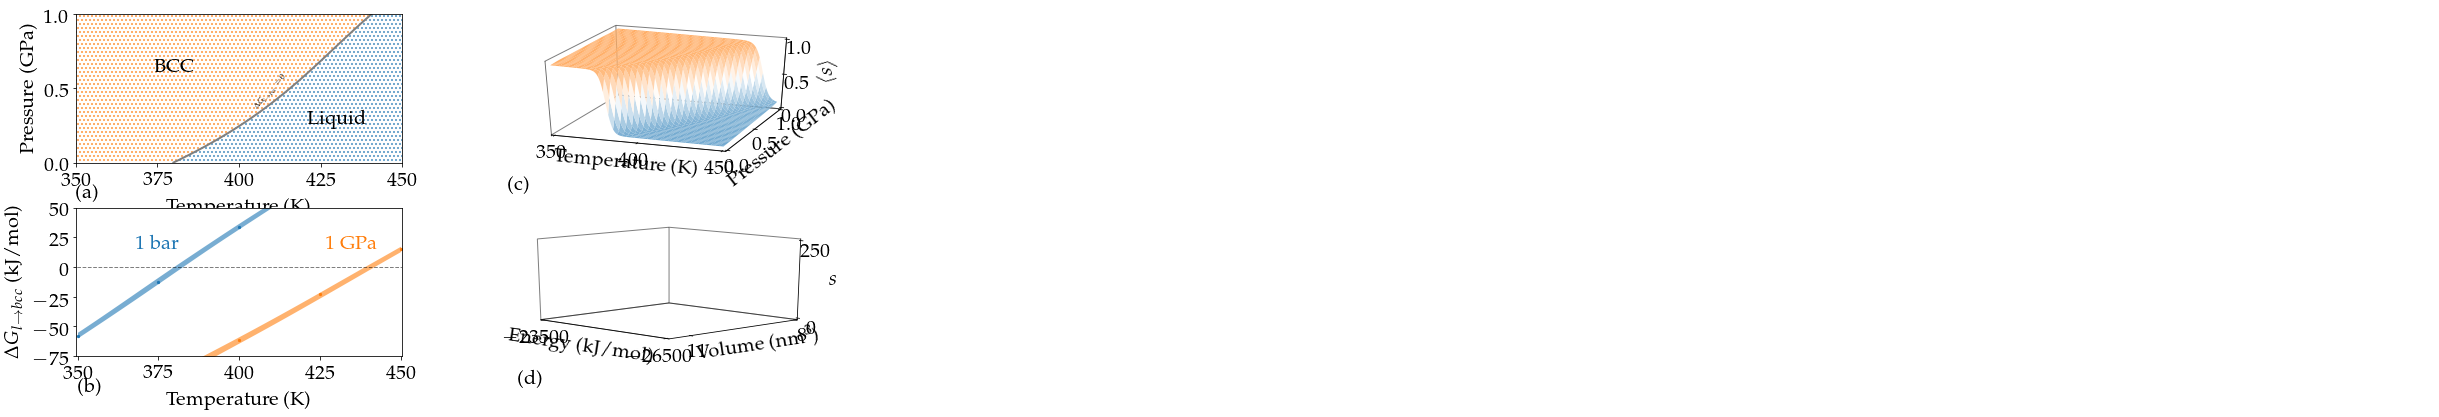

In [38]:
fig = plt.figure() 
from mpl_toolkits.mplot3d import Axes3D

ax1 = plt.subplot2grid((10,10), (0,0), colspan=4, rowspan=4)
ax2 = plt.subplot2grid((10,10), (5,0), colspan=4, rowspan=4)
ax3 = plt.subplot2grid((10,10), (0,5), colspan=4, rowspan=4, projection='3d')
ax4 = plt.subplot2grid((10,10), (5,5), colspan=4, rowspan=4, projection='3d')

#################
# Subplot 1
#################

N=41
M=41
x=np.linspace(350,450,N)
y=np.linspace(0,1,M)
X,Y=np.meshgrid(x,y,indexing='ij')


import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5
ax1.fill([350,350,441,431,421,410,397,380],[0,1,1,0.8,0.6,0.4,0.2,0], fill=False, hatch='ooo',color=palette[2],alpha=0.6,linewidth=0.)
ax1.fill([441,431,421,410,397,380,450,450],[1,0.8,0.6,0.4,0.2,0,0,1], fill=False, hatch='ooo',color=palette[0],alpha=0.6,linewidth=0.)


posmin=np.argmin(abs(freeEnergiesBccMean),axis=0)
from scipy.interpolate import interp1d, BSpline, splev, splrep
f = splrep(y,x[posmin],s=100)
y2=np.linspace(np.amin(y),np.amax(y),100)
ax1.plot(splev(y2,f),y2,color='grey',linewidth=2.)

ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Pressure (GPa)")
ax1.set_xticks(np.arange(350,475,25))

ax1.text(380,0.65,"BCC",color="black",ha='center',va='center')
ax1.text(430,0.3,"Liquid",color="black",ha='center',va='center')

ax1.text(410,0.47,r"$\Delta G_{l\rightarrow bcc}=0$",color="black",rotation=48,va='center',ha='center',fontsize=8)

ax1.set_xlim([350,450])
ax1.set_ylim([0,1])

ax1.text(350,-0.24,r"(a)")

#################
# Subplot 2
#################

x=np.linspace(340,460,5)
y=x*0.
ax2.plot(x,y,'--',linewidth=1,color="black",alpha=0.5)

x=np.linspace(350,450,N)

ax2.fill_between(x,freeEnergiesBccMean[:,0]-freeEnergiesBccErrors[:,0],freeEnergiesBccMean[:,0]+freeEnergiesBccErrors[:,0],alpha=0.6,color=palette[0],linewidth=0.)
ax2.fill_between(x,freeEnergiesBccMean[:,M-1]-freeEnergiesBccErrors[:,M-1],freeEnergiesBccMean[:,M-1]+freeEnergiesBccErrors[:,M-1],alpha=0.6,color=palette[2],linewidth=0.)
ax2.scatter(references0bar[:,0],-references0bar[:,1],s=5.,color=palette[0])
ax2.scatter(references10000bar[:,0],-references10000bar[:,1],s=5,color=palette[2])

ax2.set_xlim([349.5,450.5])
ax2.set_ylim([-75,50])
ax2.set_xticks(np.arange(350,475,25))
ax2.set_yticks(np.arange(-75,75,25))

ax2.set_xlabel("Temperature (K)")
ax2.set_ylabel(r"$\Delta G_{l\rightarrow bcc}$ (kJ/mol)")

ax2.text(375,20,"1 bar",color=palette[0],ha='center',va='center')
ax2.text(435,20,"1 GPa",color=palette[2],ha='center',va='center')

ax2.text(350,-105,r"(b)")

#################
# Subplot 3
#################

from mpl_toolkits.mplot3d import Axes3D, art3d

N=161
M=161
x=np.linspace(350,450,N)
y=np.linspace(0,1,M)
X,Y=np.meshgrid(x,y,indexing='ij')

ax3.plot_surface(X,Y,OPM/250.,cmap=my_colormap,vmin=-0.25,vmax=1.25,alpha=1)
ax3.grid(False)
ax3.xaxis.pane.set_edgecolor('black')
ax3.yaxis.pane.set_edgecolor('black')
ax3.zaxis.pane.set_edgecolor('black')
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False

ax3.set_zticks([0,0.5,1])
ax3.set_xticks([350,400,450])
ax3.set_yticks([0,0.5,1])

ax3.set_xlim([350,450])
ax3.set_ylim([0,1])
ax3.set_zlim([0,1])

ax3.set_xlabel("Temperature (K)",labelpad=-1)
ax3.set_ylabel("Pressure (GPa)",labelpad=-1)
ax3.set_zlabel(r"$\langle s \rangle$")

def lims(mplotlims):
    scale = 1.021
    offset = (mplotlims[1] - mplotlims[0])*scale
    return mplotlims[1] - offset, mplotlims[0] + offset

ax3.plot([348.5,348.5],[-0.03,-0.03],[-0.025,1.025],color="black",linewidth=0.9,alpha=0.6)
ax3.view_init(30, 290)

ax3.tick_params(pad=-1)

ax3.text(320,-0.1,-0.9,r"(c)")

#################
# Subplot 4
#################

from matplotlib.cbook import get_sample_data

#im = plt.imread(get_sample_data('/home/piaggp/Desktop/mi_clepsidra_2.png'))
size=0.22
newax = fig.add_axes([0.59, 0.23, size, size], anchor='SW', zorder=10)
#newax.imshow(im, interpolation='nearest')
newax.axis('off')
           
ax4.view_init(15, 135)

ax4.set_xlim([-26500,-23500])
ax4.set_ylim([8,11.5])
ax4.set_zlim([0,250])

ax4.grid(False)
ax4.xaxis.pane.set_edgecolor('black')
ax4.yaxis.pane.set_edgecolor('black')
ax4.zaxis.pane.set_edgecolor('black')
ax4.xaxis.pane.fill = False
ax4.yaxis.pane.fill = False
ax4.zaxis.pane.fill = False

ax4.set_xlabel("Energy (kJ/mol)",labelpad=-1)
ax4.set_ylabel(r"Volume (nm$^3$)",labelpad=-1)
ax4.set_zlabel(r"$s$",labelpad=-5)

ax4.tick_params(pad=-1.5)
ax4.set_xticks([-26500,-23500])
ax4.set_yticks([8,11])
ax4.set_zticks([0,250])

ax4.text(-22500,11.35,-250.0,r"(d)")

#################
# Plot label
#################

#plt.savefig("/home/piaggp/Desktop/plot4-2.pdf", bbox_inches='tight',dpi=300)
#plt.savefig("plot4.png", bbox_inches='tight', dpi=300)

plt.show()